<a href="https://colab.research.google.com/github/wilsonhoyos1/Proyecto_Reconocimiento_Ocular_Enfermedades/blob/main/Proyecto_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/wilsonhoyos1/Proyecto_Reconocimiento_Ocular_Enfermedades/blob/main/Proyecto_Entrega2.ipynb)

In [ ]:
"""Other way of loading data"""
#!pip install opendatasets
#import opendatasets as od
#od.download("https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k")
"""This requires of entering manually your kaggle personal credentials"""

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
"""Prefered way of loading data due to its ease"""
import os
os.environ['KAGGLE_USERNAME'] = "wilsonhoyosbenavides" # username from the json file
os.environ['KAGGLE_KEY'] = "dcca300220865f6af4b2f59796b16b35" # key from the json file
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k #database to work on

ocular-disease-recognition-odir5k.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
"""unloading package to destination"""
!mkdir ocular_diseases
!unzip ocular-disease-recognition-odir5k.zip -d ocular_diseases

Streaming output truncated to the last 5000 lines.
  inflating: ocular_diseases/preprocessed_images/2179_left.jpg  
  inflating: ocular_diseases/preprocessed_images/2179_right.jpg  
  inflating: ocular_diseases/preprocessed_images/217_left.jpg  
  inflating: ocular_diseases/preprocessed_images/217_right.jpg  
  inflating: ocular_diseases/preprocessed_images/2180_left.jpg  
  inflating: ocular_diseases/preprocessed_images/2180_right.jpg  
  inflating: ocular_diseases/preprocessed_images/2181_left.jpg  
  inflating: ocular_diseases/preprocessed_images/2181_right.jpg  
  inflating: ocular_diseases/preprocessed_images/2182_left.jpg  
  inflating: ocular_diseases/preprocessed_images/2182_right.jpg  
  inflating: ocular_diseases/preprocessed_images/2183_left.jpg  
  inflating: ocular_diseases/preprocessed_images/2183_right.jpg  
  inflating: ocular_diseases/preprocessed_images/2184_left.jpg  
  inflating: ocular_diseases/preprocessed_images/2184_right.jpg  
  inflating: ocular_diseases/prepr

In [ ]:
"""verifying data"""
!ls ocular_diseases/ODIR-5K/ODIR-5K
print("train images:",len(os.listdir('/content/ocular_diseases/ODIR-5K/ODIR-5K/Training Images')),'=',str(100*len(os.listdir('/content/ocular_diseases/ODIR-5K/ODIR-5K/Training Images'))/(len(os.listdir('/content/ocular_diseases/ODIR-5K/ODIR-5K/Testing Images'))+len(os.listdir('/content/ocular_diseases/ODIR-5K/ODIR-5K/Training Images'))))+'%')
print("test images:",len(os.listdir('/content/ocular_diseases/ODIR-5K/ODIR-5K/Testing Images')),'=',str(100*len(os.listdir('/content/ocular_diseases/ODIR-5K/ODIR-5K/Testing Images'))/(len(os.listdir('/content/ocular_diseases/ODIR-5K/ODIR-5K/Testing Images'))+len(os.listdir('/content/ocular_diseases/ODIR-5K/ODIR-5K/Training Images'))))+'%')



 data.xlsx  'Testing Images'  'Training Images'
train images: 7000 = 87.5%
test images: 1000 = 12.5%


In [ ]:
"""main modules for processing information"""
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
from PIL import Image

In [ ]:
"""Obtaining DataFrame from Excel archive and simple review of the dataset"""
arch =('ocular_diseases/full_df.csv')
DF = pd.read_csv(arch)
DF.set_index=DF["ID"]
print("First three data:")
display(DF.head(3))
print("Last two data:")
display(DF.tail(2))
print("description:")
DF.describe()


First three data:


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg


Last two data:


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg
6391,4784,58,Male,4784_left.jpg,4784_right.jpg,hypertensive retinopathy，age-related macular d...,hypertensive retinopathy，age-related macular d...,0,0,0,0,1,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",4784_left.jpg


description:


,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
"""characterization of total diseases per patient"""
DF["Num of diseases"] = DF[['N', 'D', 'G','C', 'A', 'H', 'M', 'O']].sum(axis = 1)
DF["Num of diseases"].unique()


array([1, 2, 3])

In [ ]:
"""separating data provided the number of diseases (1 minimum - 3 maximum)"""
DF1 = DF[DF["Num of diseases"] == 1]
DF2 = DF[DF["Num of diseases"] == 2]
DF3 = DF[DF["Num of diseases"] == 3]

print("One disease patients",len(DF1))
print("Two disease patients",len(DF2))
print("Three disease patients",len(DF3))
print("total",len(DF))

One disease patients 5391
Two disease patients 955
Three disease patients 46
total 6392


In [ ]:
"""dictionary of diseases"""
diseases = {
    0: 'Normal',
    1: 'Diabetes',
    2: 'Glaucoma',
    3: 'Cataract',
    4: 'Age related Macular Degeneration ',
    5: 'Hypertension ',
    6: 'Pathological Myopia',
    7: 'Other diseases/abnormalities',
}

One disease

In [ ]:
"""creating a columns that specifies the diseases of each DataFrame"""
DF1['Disease'] = DF1.apply(lambda row: (diseases[np.argmax([row['N'], row['D'], row['G'], row['C'], row['A'], row['H'], row['M'], row['O']])]), axis = 1)
display(DF1[["ID",'N','D','G','C','A','H','M','O',"Num of diseases","Disease",]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,N,D,G,C,A,H,M,O,Num of diseases,Disease
0,0,0,0,0,1,0,0,0,0,1,Cataract
1,1,1,0,0,0,0,0,0,0,1,Normal
4,5,0,1,0,0,0,0,0,0,1,Diabetes
7,8,1,0,0,0,0,0,0,0,1,Normal
8,9,0,0,0,0,0,0,0,1,1,Other diseases/abnormalities
...,...,...,...,...,...,...,...,...,...,...,...
6386,4683,0,1,0,0,0,0,0,0,1,Diabetes
6387,4686,0,1,0,0,0,0,0,0,1,Diabetes
6388,4688,0,1,0,0,0,0,0,0,1,Diabetes
6389,4689,0,1,0,0,0,0,0,0,1,Diabetes


Two diseases

In [ ]:
DF2['Disease'] = DF2.apply(lambda row: (diseases[np.flatnonzero([row['N'], row['D'], row['G'], row['C'], row['A'], row['H'], row['M'], row['O']])[0]],diseases[np.flatnonzero([row['N'], row['D'], row['G'], row['C'], row['A'], row['H'], row['M'], row['O']])[-1]]), axis = 1)
display(DF2[["ID",'N','D','G','C','A','H','M','O',"Num of diseases","Disease",]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,N,D,G,C,A,H,M,O,Num of diseases,Disease
2,2,0,1,0,0,0,0,0,1,2,"(Diabetes, Other diseases/abnormalities)"
3,4,0,1,0,0,0,0,0,1,2,"(Diabetes, Other diseases/abnormalities)"
5,6,0,1,0,0,0,0,0,1,2,"(Diabetes, Other diseases/abnormalities)"
6,7,0,1,0,0,0,0,0,1,2,"(Diabetes, Other diseases/abnormalities)"
10,11,0,1,0,0,0,1,0,0,2,"(Diabetes, Hypertension )"
...,...,...,...,...,...,...,...,...,...,...,...
6276,4551,0,1,0,0,0,0,0,1,2,"(Diabetes, Other diseases/abnormalities)"
6310,4588,0,1,0,0,0,0,0,1,2,"(Diabetes, Other diseases/abnormalities)"
6313,4591,0,1,0,0,0,1,0,0,2,"(Diabetes, Hypertension )"
6372,4659,0,1,0,0,0,0,0,1,2,"(Diabetes, Other diseases/abnormalities)"


Three diseases

In [ ]:
DF3['Disease'] = DF3.apply(lambda row: (diseases[np.flatnonzero([row['N'], row['D'], row['G'], row['C'], row['A'], row['H'], row['M'], row['O']])[0]],diseases[np.flatnonzero([row['N'], row['D'], row['G'], row['C'], row['A'], row['H'], row['M'], row['O']])[1]],diseases[np.flatnonzero([row['N'], row['D'], row['G'], row['C'], row['A'], row['H'], row['M'], row['O']])[-1]]), axis = 1)
display(DF3[["ID",'N','D','G','C','A','H','M','O',"Num of diseases","Disease",]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,N,D,G,C,A,H,M,O,Num of diseases,Disease
160,188,0,1,0,1,0,0,0,1,3,"(Diabetes, Cataract, Other diseases/abnormalit..."
267,305,0,1,0,0,0,1,0,1,3,"(Diabetes, Hypertension , Other diseases/abnor..."
546,625,0,0,1,1,0,0,0,1,3,"(Glaucoma, Cataract, Other diseases/abnormalit..."
808,938,0,1,0,0,1,0,1,0,3,"(Diabetes, Age related Macular Degeneration , ..."
1030,1263,0,0,1,0,0,1,0,1,3,"(Glaucoma, Hypertension , Other diseases/abnor..."
1062,1303,0,0,1,0,0,1,0,1,3,"(Glaucoma, Hypertension , Other diseases/abnor..."
1105,1410,0,1,1,0,0,0,0,1,3,"(Diabetes, Glaucoma, Other diseases/abnormalit..."
1148,1474,0,1,1,0,0,0,0,1,3,"(Diabetes, Glaucoma, Other diseases/abnormalit..."
1279,1674,0,1,0,0,0,0,1,1,3,"(Diabetes, Pathological Myopia, Other diseases..."
1286,1718,0,1,0,0,0,0,1,1,3,"(Diabetes, Pathological Myopia, Other diseases..."


Creating nan values in Age culomn

In [ ]:
"""random (>5%) different ID values"""
indexes=list()
num_nan = 320
i=0
while i<num_nan:
  a=random.randrange(0,6392)
  if a not in indexes:
    indexes.append(a)
  else:
    num_nan+=1
    if len(indexes)>=320:
      break
print("Se generarán",len(indexes),"valores nulos en edad")

Se generarán 336 valores nulos en edad


In [ ]:
"""adding nan values"""
for i in indexes:
  DF["Patient Age"][i] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Creating nan values in Sex column

In [ ]:
indexes=list()
num_nan = 320
i=0
while i<num_nan:
  a=random.randrange(0,6392)
  if a not in indexes:
    indexes.append(a)
  else:
    num_nan+=1
    if len(indexes)>=320:
      break
print(len(indexes))

325


In [ ]:
for i in indexes:
  DF["Patient Sex"][i] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("Información sobre sexo:\n")
display(DF["Patient Sex"].describe())
print("\nInformación sobre edad:\n")
display(DF["Patient Age"].describe())

Información sobre sexo:



count     6067
unique       2
top       Male
freq      3261
Name: Patient Sex, dtype: object


Información sobre edad:



count    6056.000000
mean       57.806143
std        11.757559
min         1.000000
25%        51.000000
50%        59.000000
75%        65.000000
max        91.000000
Name: Patient Age, dtype: float64

In [ ]:
"""adding all DataFrames to the original"""
DF["diseases"]=DF1["Disease"]
DF["diseases"][DF["diseases"].isna()]=DF2["Disease"]
DF["diseases"][DF["diseases"].isna()]=DF3["Disease"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
DF

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,Num of diseases,diseases
0,0,69.0,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,1,Cataract
1,1,57.0,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,1,Normal
2,2,42.0,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,2,"(Diabetes, Other diseases/abnormalities)"
3,4,53.0,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,2,"(Diabetes, Other diseases/abnormalities)"
4,5,50.0,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,1,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63.0,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,1,Diabetes
6388,4688,NaN,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,1,Diabetes
6389,4689,54.0,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,1,Diabetes
6390,4690,57.0,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,1,Diabetes


In [ ]:
left_eye = Image.open(r"/content/ocular_diseases/preprocessed_images/0_left.jpg")
right_eye = Image.open(r"/content/ocular_diseases/preprocessed_images/0_right.jpg")

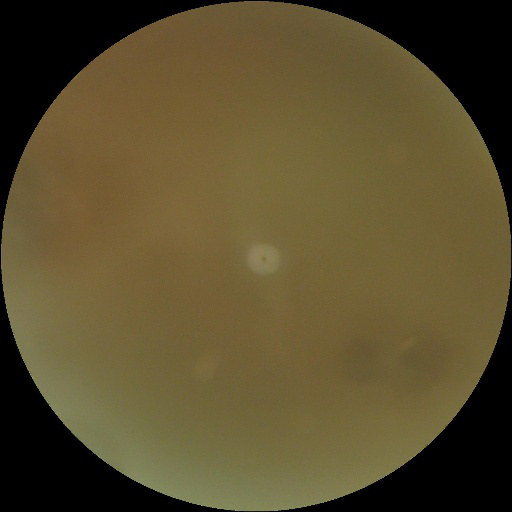

In [ ]:
left_eye

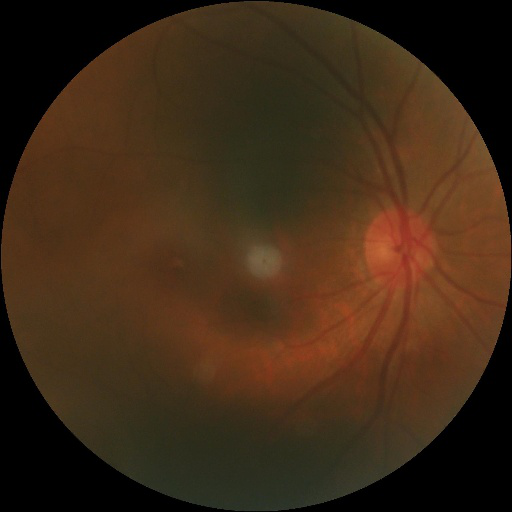

In [ ]:
right_eye